In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

# This link shows you how to greyscale a cmap
# https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

In [3]:
# First let's find all of our data
basePath = '/Users/kolbt/Desktop/compiled/whingdingdilly/ipython/epsilon_1_find_diameter/5050mix'
dataPath = basePath + '/eps1_mix_txts'

# Go to the correct parent directory
os.chdir(basePath)
txtFiles = os.listdir(dataPath)
numFiles = len(txtFiles)

In [4]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def varSort(arr):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for alpha
    cpy = np.copy(arr)
    ind = np.arange(0, len(arr))
    for i in xrange(len(cpy)):
        for j in xrange(len(cpy)):
            # Sort by first variable
            if cpy[i] > cpy[j] and i < j:
                # Swap copy array values
                cpy[i], cpy[j] = cpy[j], cpy[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]    
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [5]:
# You want to load the data in so that it's sorted to begin with
os.chdir(dataPath)
peAs = []
for i in xrange(numFiles):
    peAs.append(getFromTxt(txtFiles[i], "_pa", "_pb"))
    
# Now sort the array of txtFile names
indArr = varSort(peAs)
indSort(peAs, indArr)
indSort(txtFiles, indArr)

In [6]:
# Read in the data in pandas dataframes
all_sims = []
os.chdir(dataPath)
for i in xrange(numFiles):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)

In [7]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(numFiles):
    myBool = chkSort(all_sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(txtFiles[i])
        exit(1)
    else:
        print("{} sorted... ").format(txtFiles[i])

diam_pa0_pb500_xa50.txt sorted... 
diam_pa50_pb500_xa50.txt sorted... 
diam_pa100_pb500_xa50.txt sorted... 
diam_pa150_pb500_xa50.txt sorted... 
diam_pa200_pb500_xa50.txt sorted... 
diam_pa250_pb500_xa50.txt sorted... 
diam_pa300_pb500_xa50.txt sorted... 
diam_pa350_pb500_xa50.txt sorted... 
diam_pa400_pb500_xa50.txt sorted... 
diam_pa450_pb500_xa50.txt sorted... 
diam_pa500_pb500_xa50.txt sorted... 


In [8]:
display(all_sims[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,...,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0.0,172757,166717,339474,77243,83283,160526,3112,3241,6353,...,0.8684,0.9024,0.8684,0.8546,0.52,3849.4,97174.1,1.65,1.65,0.61
1,200000.0,168127,160156,328283,81873,89844,171717,4571,4907,9478,...,0.8653,0.8989,0.8664,0.8565,0.52,5728.1,103722.8,1.65,1.66,0.60
2,400000.0,159466,149871,309337,90534,100129,190663,3725,4267,7992,...,0.8700,0.9638,0.8678,0.8430,0.52,5099.2,121936.6,1.57,1.56,0.58
3,600000.0,161492,151980,313472,88508,98020,186528,6288,6935,13223,...,0.8700,0.9133,0.8605,0.8480,0.52,8036.1,113342.8,1.65,1.65,0.58
4,800000.0,162837,153080,315917,87163,96920,184083,2942,3246,6188,...,0.8654,0.9157,0.8654,0.8376,0.52,3726.1,110806.5,1.66,1.66,0.58
5,1000000.0,173210,164658,337868,76790,85342,162132,3914,4494,8408,...,0.8622,0.9360,0.8661,0.8571,0.52,5286.1,102077.7,1.59,1.59,0.61
6,1200000.0,162311,152860,315171,87689,97140,184829,6485,7165,13650,...,0.8569,0.9201,0.8654,0.8463,0.51,8342.4,112948.2,1.64,1.64,0.58
7,1400000.0,166112,156666,322778,83888,93334,177222,3934,4397,8331,...,0.8669,0.9241,0.8675,0.8424,0.52,5089.2,108283.2,1.64,1.64,0.59
8,1600000.0,171451,162229,333680,78549,87771,166320,3998,4492,8490,...,0.8665,0.9163,0.8711,0.8441,0.52,5150.1,100913.8,1.65,1.65,0.60
9,1800000.0,165823,156088,321911,84177,93912,178089,3708,4249,7957,...,0.8691,0.8959,0.8719,0.8420,0.52,4703.4,105356.3,1.69,1.69,0.59


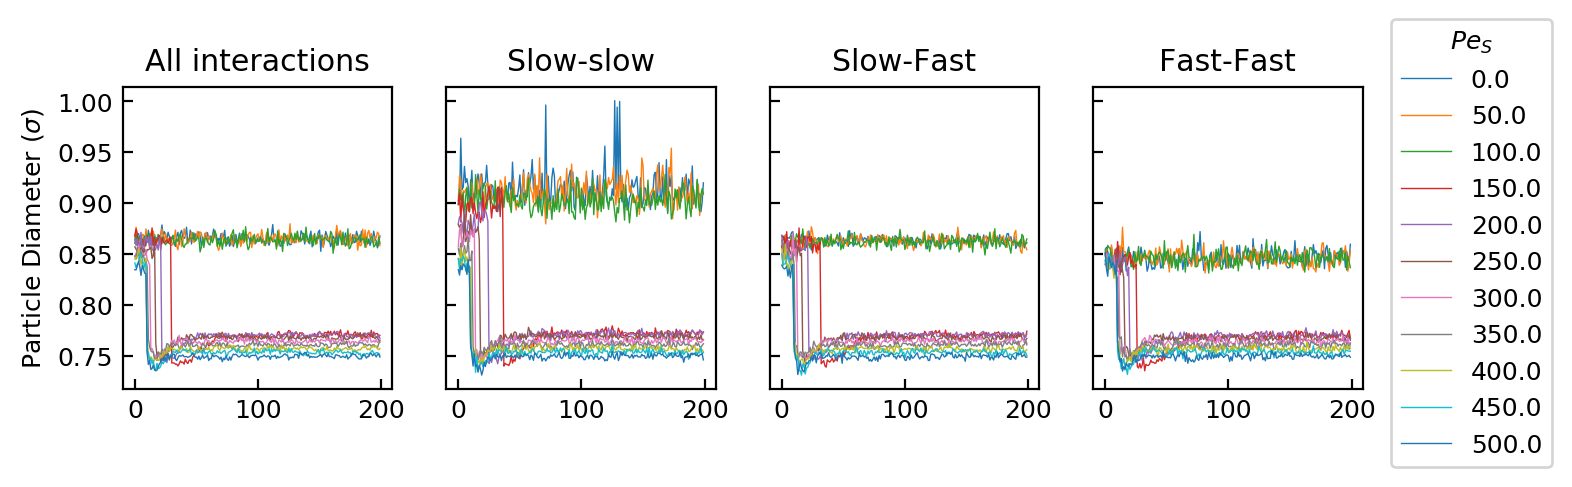

In [9]:
# Make sure I haven't messed up my data
all_xs = np.arange(0, len(all_sims[0]['Timestep']))

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(numFiles):
    ax[0].plot(all_xs, all_sims[i]['sigALL'], label=peAs[i])
    ax[1].plot(all_xs, all_sims[i]['sigAA'], label=peAs[i])
    ax[2].plot(all_xs, all_sims[i]['sigAB'], label=peAs[i])
    ax[3].plot(all_xs, all_sims[i]['sigBB'], label=peAs[i])
# ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'Particle Diameter $(\sigma)$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$Pe_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.3))
plt.show()


In [10]:
# Now get time-based steady state values

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
# Initialize dataframes
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)
    
# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of data after steady-state time (25tb) in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-20:-1, j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[-20:-1, j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2

pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,170641,161248,331889,79359.1,88752.3,168111,4149.11,4641.63,8790.74,2172.16,0.864268,0.912137,0.862,0.848184,0.519474,5335.82,101983,1.64789,1.64789,0.600526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,29765.8,29748.8,59514.6,220234,220251,440485,46088.7,45883.6,91972.3,62513.5,0.749711,0.750168,0.749437,0.749689,0.45,40625.1,194566,2.26421,2.26421,0.13


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,3992.12,4509.66,8497.92,3992.12,4509.66,8497.92,1729.67,1932.36,3661.67,144.292,0.00464861,0.0112856,0.00427539,0.00602165,0.00223297,2243.56,4619.22,0.0201518,0.0209206,0.0105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,583.222,579.765,1135.13,583.222,579.765,1135.13,410.621,256.047,664.561,1810.42,0.0017779,0.00222523,0.0018545,0.00147858,0,370.418,1043.82,0.00877544,0.00877544,5.55112e-17


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,1.5937e+07,2.03371e+07,7.22146e+07,1.5937e+07,2.03371e+07,7.22146e+07,2.99176e+06,3.73401e+06,1.34078e+07,20820.1,2.16095e-05,0.000127364,1.82789e-05,3.62603e-05,4.98615e-06,5.03354e+06,2.13372e+07,0.000406094,0.000437673,0.000110249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,340148,336127,1.28851e+06,340148,336127,1.28851e+06,168610,65560.2,441641,3.27763e+06,3.16094e-06,4.95163e-06,3.43917e-06,2.1862e-06,0,137210,1.08956e+06,7.70083e-05,7.70083e-05,3.08149e-33


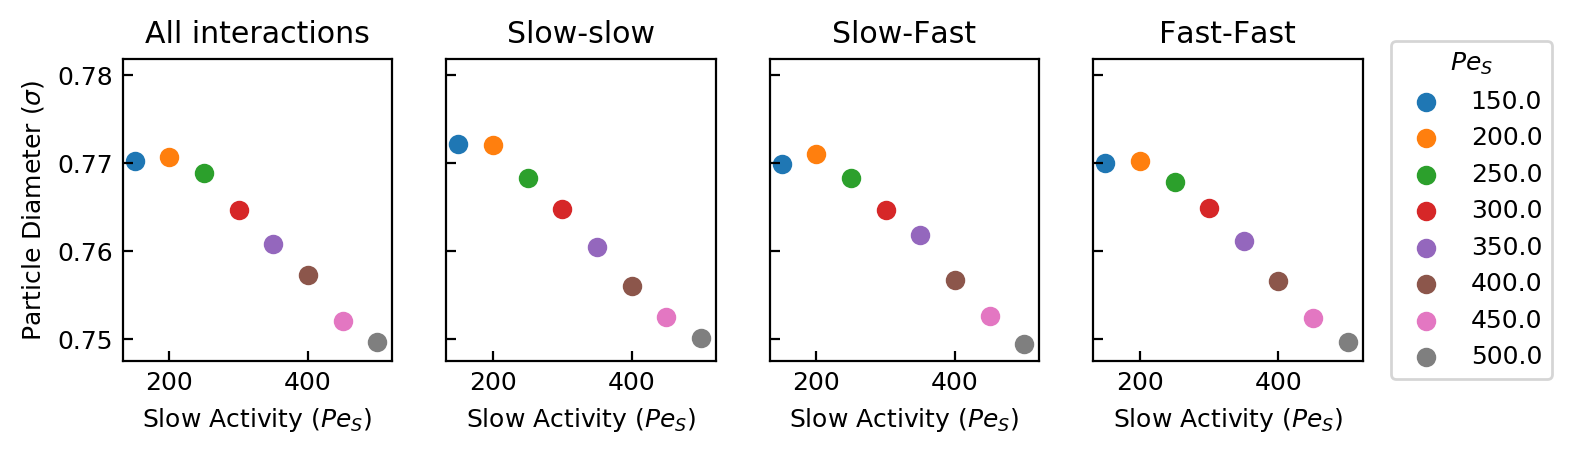

In [11]:
# Now we plot the steady state diameters
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(numFiles):
    if peAs[i] >= 150:
        ax[0].scatter(peAs[i], SS['sigALL'][i], label=peAs[i])
        ax[1].scatter(peAs[i], SS['sigAA'][i], label=peAs[i])
        ax[2].scatter(peAs[i], SS['sigAB'][i], label=peAs[i])
        ax[3].scatter(peAs[i], SS['sigBB'][i], label=peAs[i])
# ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'Particle Diameter $(\sigma)$')
ax[0].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[1].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[2].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[3].set_xlabel(r'Slow Activity $(Pe_{S})$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$Pe_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.1))
plt.show()

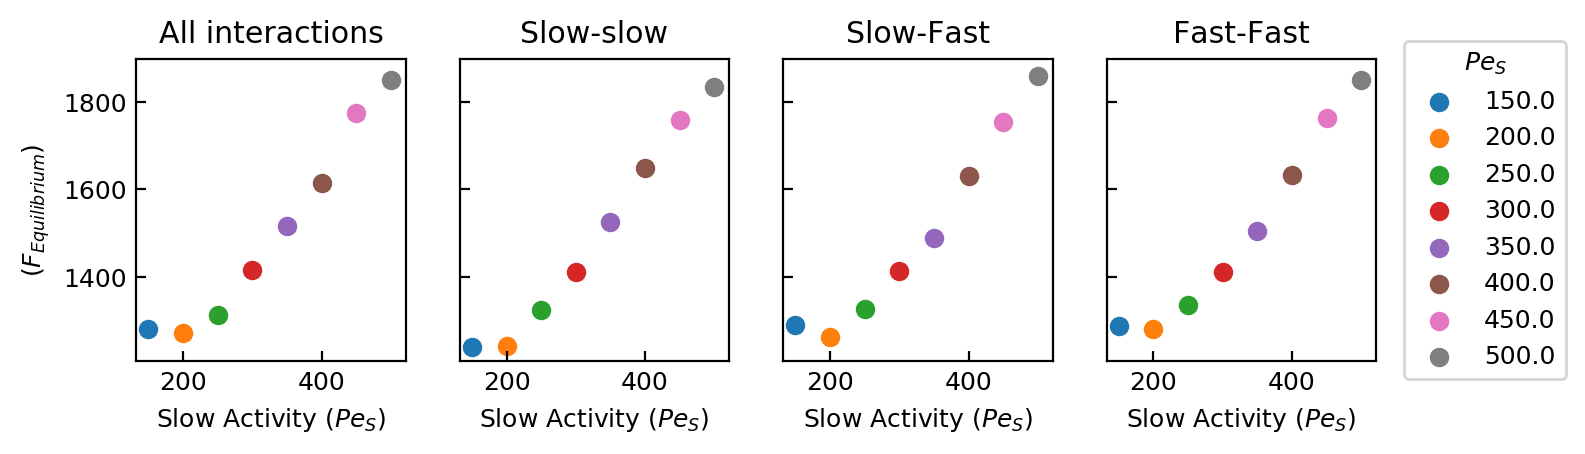

In [12]:
# Now compute the force experienced (F_LJ has to match this at sigma = 1)
def sigmaToForce(r):
    '''Take in the distance get out the equilibrium force'''
    epsilon = 1.0
    sigma = 1.0
    experiencedForce = 24.0 * epsilon * ( ((2*sigma**12)/r**13) - ((sigma**6)/r**7) )
    return experiencedForce

# Now we plot the steady state diameters
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(numFiles):
    if peAs[i] >= 150:
        ax[0].scatter(peAs[i], sigmaToForce(SS['sigALL'][i]), label=peAs[i])
        ax[1].scatter(peAs[i], sigmaToForce(SS['sigAA'][i]), label=peAs[i])
        ax[2].scatter(peAs[i], sigmaToForce(SS['sigAB'][i]), label=peAs[i])
        ax[3].scatter(peAs[i], sigmaToForce(SS['sigBB'][i]), label=peAs[i])
# ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'$(F_{Equilibrium})$')
ax[0].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[1].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[2].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[3].set_xlabel(r'Slow Activity $(Pe_{S})$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$Pe_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.1))
plt.show()



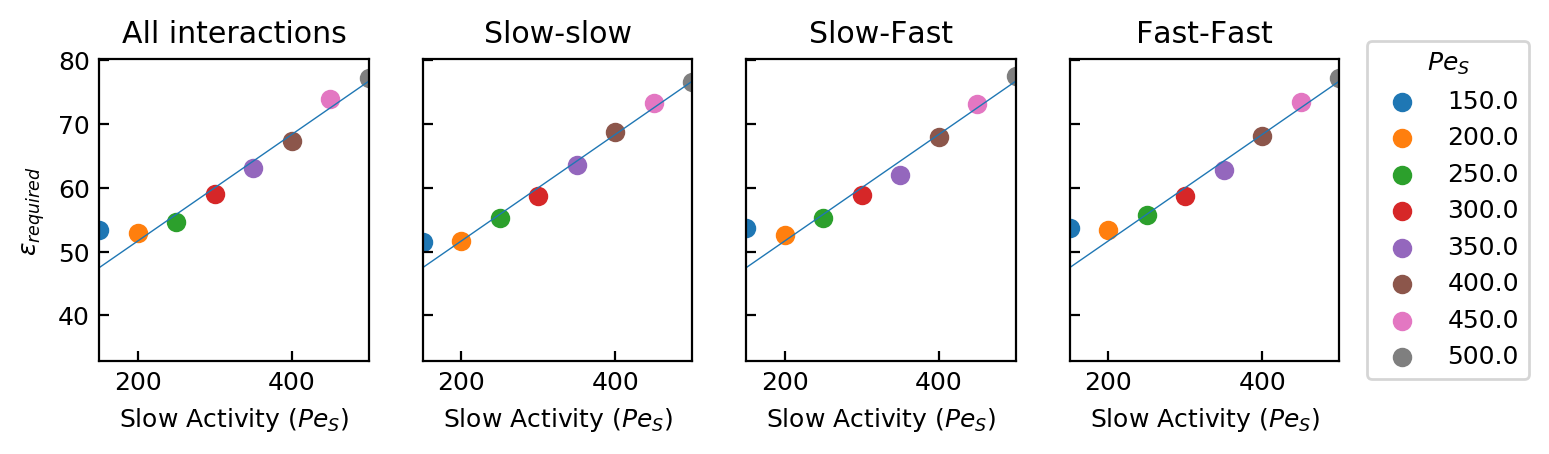

In [13]:
def overlayRatio(Fa):
    sigma = 1.0
    ratio = (2 * Fa * sigma / 24.0) + 35
    return ratio

# Now plot with necessary epsilon
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

# Let's plot the lines
xs = np.arange(0, 500.0, 0.01)
ys = np.zeros_like(xs)
for i in xrange(len(xs)):
    ys[i] = overlayRatio(xs[i])
ax[0].plot(xs, ys)
ax[1].plot(xs, ys)
ax[2].plot(xs, ys)
ax[3].plot(xs, ys)

for i in xrange(numFiles):
    if peAs[i] >= 150:
        ax[0].scatter(peAs[i], sigmaToForce(SS['sigALL'][i])/24.0, label=peAs[i])
        ax[1].scatter(peAs[i], sigmaToForce(SS['sigAA'][i])/24.0, label=peAs[i])
        ax[2].scatter(peAs[i], sigmaToForce(SS['sigAB'][i])/24.0, label=peAs[i])
        ax[3].scatter(peAs[i], sigmaToForce(SS['sigBB'][i])/24.0, label=peAs[i])
# ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'$\epsilon_{required}$')
ax[0].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[1].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[2].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[3].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[0].set_xlim(150, 500)
ax[1].set_xlim(150, 500)
ax[2].set_xlim(150, 500)
ax[3].set_xlim(150, 500)

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$Pe_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.1))
plt.show()

Predicted coefficient in numerator: 1.78885032667, intercept: 38.4311663316
Predicted coefficient in numerator: 1.8721546265, intercept: 37.0462818721
Predicted coefficient in numerator: 1.77035318637, intercept: 38.6307554195
Predicted coefficient in numerator: 1.74902494118, intercept: 39.1425282589


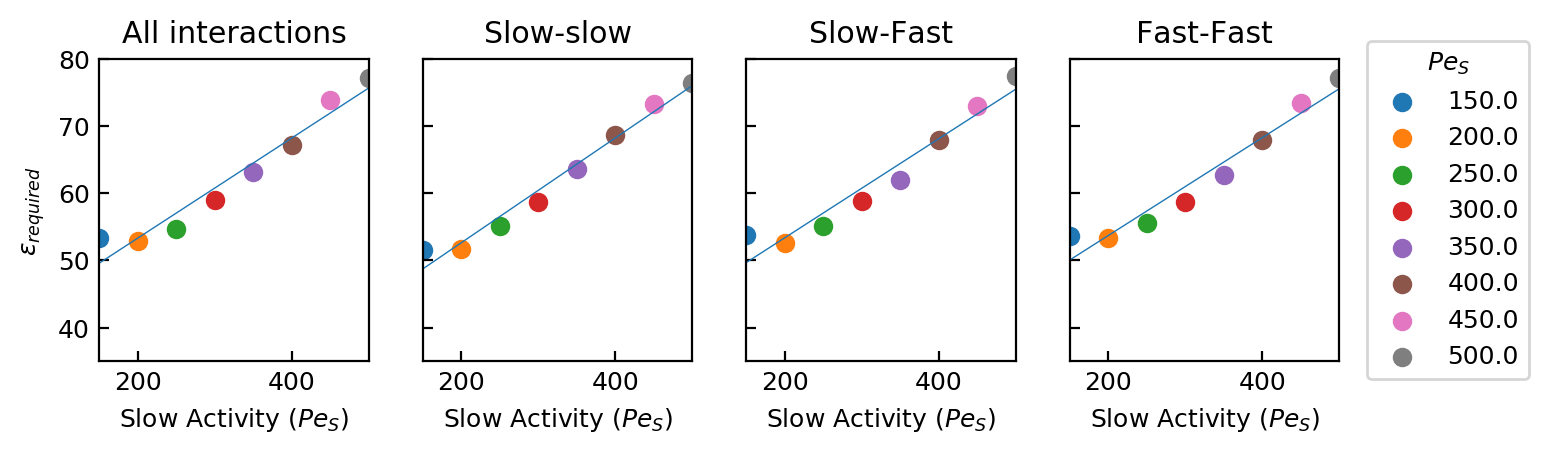

In [14]:
# Let's just fit the data with scipy
def fitDataToLine(xdat, ydat):
    slope, intercept, r_value, p_value, std_err = stats.linregress(xdat, ydat)
    return slope, intercept, r_value, p_value, std_err

# Fix type issues with the dataframe
peAsToFit = []
ALLy = []
AAy = []
ABy = []
BBy = []
for i in xrange(numFiles):
    if peAs[i] >= 150:
        peAsToFit.append(peAs[i])
        ALLy.append(sigmaToForce(SS['sigALL'][i])/24.0)
        AAy.append(sigmaToForce(SS['sigAA'][i])/24.0)
        ABy.append(sigmaToForce(SS['sigAB'][i])/24.0)
        BBy.append(sigmaToForce(SS['sigBB'][i])/24.0)

allFit = fitDataToLine(peAsToFit, ALLy)
AAFit = fitDataToLine(peAsToFit, AAy)
ABFit = fitDataToLine(peAsToFit, ABy)
BBFit = fitDataToLine(peAsToFit, BBy)
print("Predicted coefficient in numerator: {}, intercept: {}").format(allFit[0] * 24.0, allFit[1])
print("Predicted coefficient in numerator: {}, intercept: {}").format(AAFit[0] * 24.0, AAFit[1])
print("Predicted coefficient in numerator: {}, intercept: {}").format(ABFit[0] * 24.0, ABFit[1])
print("Predicted coefficient in numerator: {}, intercept: {}").format(BBFit[0] * 24.0, BBFit[1])

# Start plotting
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

# Now let's plot the overlay on the data
xs = np.arange(0, 500, 0.01)
ys = np.zeros_like(xs)
for i in xrange(len(xs)):
    ys[i] = allFit[0] * xs[i] + allFit[1]
ax[0].plot(xs, ys)
for i in xrange(len(xs)):
    ys[i] = AAFit[0] * xs[i] + AAFit[1]
ax[1].plot(xs, ys)
for i in xrange(len(xs)):
    ys[i] = ABFit[0] * xs[i] + ABFit[1]
ax[2].plot(xs, ys)
for i in xrange(len(xs)):
    ys[i] = BBFit[0] * xs[i] + BBFit[1]
ax[3].plot(xs, ys)

# Plot SS data on top
for i in xrange(numFiles):
    if peAs[i] >= 150:
        ax[0].scatter(peAs[i], sigmaToForce(SS['sigALL'][i])/24.0, label=peAs[i])
        ax[1].scatter(peAs[i], sigmaToForce(SS['sigAA'][i])/24.0, label=peAs[i])
        ax[2].scatter(peAs[i], sigmaToForce(SS['sigAB'][i])/24.0, label=peAs[i])
        ax[3].scatter(peAs[i], sigmaToForce(SS['sigBB'][i])/24.0, label=peAs[i])
# ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'$\epsilon_{required}$')
ax[0].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[1].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[2].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[3].set_xlabel(r'Slow Activity $(Pe_{S})$')
ax[0].set_xlim(150, 500)
ax[1].set_xlim(150, 500)
ax[2].set_xlim(150, 500)
ax[3].set_xlim(150, 500)

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$Pe_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.1))
plt.show()

In [15]:
# This tells us that the ratio we should use is: epsilon = (2 * F_A * sigma / 24.0) + 40.0
# Entirely different from what monodisperse systems tell us...